# Melodic arch

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import music21
import scipy.stats
import seaborn as sns

import sys
sys.path.append('../')
from helpers import plot_footer, cm2inch

matplotlib.style.use('styles.mplstyle')
copyright = '(c) Bas Cornelissen (CC BY 4.0 licence)'

In [2]:
def get_normalized_contour(df):
    ys = df.iloc[:, 6:].values
    means = ys.mean(axis=1)
    ys_norm = ys - means[:, np.newaxis]
    return ys_norm

In [3]:
dataset_ids = [
    'creighton', 
    'boehme',
    'erk',
    'han',
    'shanxi',
    'natmin',
    'liber-antiphons',
    'liber-responsories',
    'liber-alleluias',
]

dfs = {}
contours = {}
for dataset_id in dataset_ids:
    dfs[dataset_id] = pd.read_csv(f'../data/{dataset_id}-phrase-contours.csv', index_col=0)
    dfs[f'{dataset_id}-random'] = pd.read_csv(f'../data/{dataset_id}-random-contours.csv', index_col=0)
    contours[dataset_id] = get_normalized_contour(dfs[dataset_id])
    contours[f'{dataset_id}-random'] = get_normalized_contour(dfs[f'{dataset_id}-random'])

# Average phrase contours

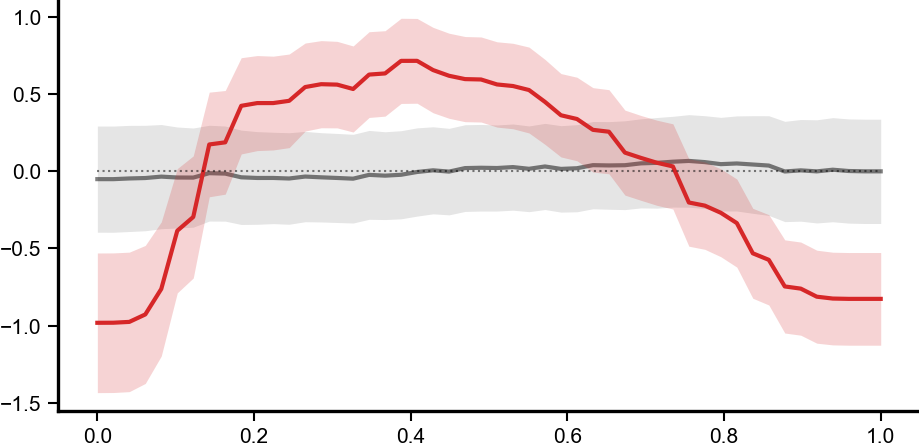

In [4]:
def plot_bla(contours, baseline, f=.25, color='C3'):
    xs = np.linspace(0, 1, contours.shape[1])

    b_mean = baseline.mean(axis=0)
    b_std = (f/2) * baseline.std(axis=0)
    plt.plot(xs, b_mean, 'k', lw=1, zorder=-1, alpha=.5, label='random baseline')
    plt.fill_between(xs, b_mean-b_std, b_mean+b_std, alpha=.1, color='k',lw=0)
    
    mean = contours.mean(axis=0)
    std = f/2 * contours.std(axis=0)
    plt.plot(xs, mean, color, lw=1, label=f'phrases')
    plt.fill_between(xs, mean-std, mean+std, alpha=.2, color=color, label=f'${f:.2f}\sigma$', lw=0)
    plt.plot([0, 1], [0, 0], 'k:', lw=.5, alpha=.5)
    
#     plt.legend()
#     plt.ylabel('normalized pitch (st)')
#     plt.xlabel('position in phrase')

plt.figure(figsize=cm2inch(8,4))
plot_bla(contours['erk'], contours['erk-random'])

/Users/Bas/repos/papers/fma-melodic-contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


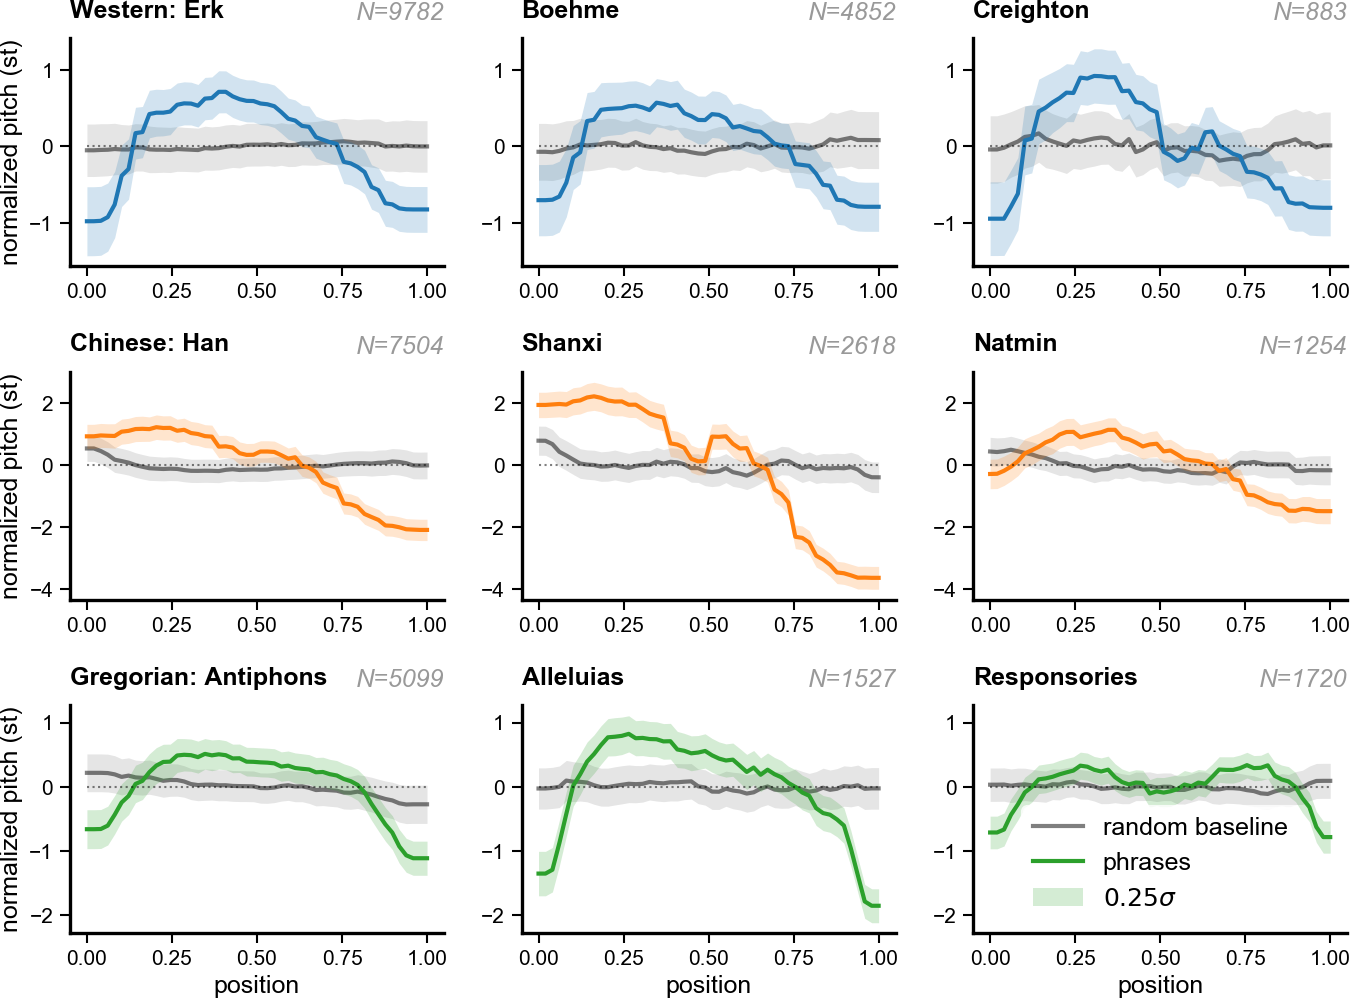

In [5]:
title = lambda x: plt.title(x, ha='left', x=0)
def show_num_contours(num_contours, ax, y=1.06):
    plt.text(1, y, f'N={num_contours}', transform=ax.transAxes, 
         va='bottom', ha='right', size=6, fontstyle='italic', color='0.6')

    
plt.figure(figsize=cm2inch(12,9))
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=1)
plot_bla(contours['erk'], contours['erk-random'], color='C0')
title('Western: Erk')
show_num_contours(len(contours['erk']), ax1)
plt.ylabel('normalized pitch (st)')

ax2 = plt.subplot2grid((3, 3), (0, 1), sharey=ax1)
plot_bla(contours['boehme'], contours['boehme-random'], color='C0')
show_num_contours(len(contours['boehme']), ax2)
title(f'Boehme')

ax3 = plt.subplot2grid((3, 3), (0, 2), sharey=ax1)
plot_bla(contours['creighton'], contours['creighton-random'], color='C0')
show_num_contours(len(contours['creighton']), ax3)
title('Creighton')

ax4 = plt.subplot2grid((3, 3), (1, 0))
plot_bla(contours['han'], contours['han-random'], color='C1')
title('Chinese: Han')
show_num_contours(len(contours['han']), ax4)
plt.ylabel('normalized pitch (st)')


ax5 = plt.subplot2grid((3, 3), (1, 1), sharey=ax4)
plot_bla(contours['shanxi'], contours['shanxi-random'], color='C1')
show_num_contours(len(contours['shanxi']), ax5)
title('Shanxi')

ax6 = plt.subplot2grid((3, 3), (1, 2), sharey=ax4)
plot_bla(contours['natmin'], contours['natmin-random'], color='C1')
show_num_contours(len(contours['natmin']), ax6)
title('Natmin')

ax7 = plt.subplot2grid((3, 3), (2, 0))
plot_bla(contours['liber-antiphons'], contours['liber-antiphons-random'], color='C2')
show_num_contours(len(contours['liber-antiphons']), ax7)
title('Gregorian: Antiphons')
plt.xlabel('position')
plt.ylabel('normalized pitch (st)')

ax8 = plt.subplot2grid((3, 3), (2, 1), sharey=ax7)
plot_bla(contours['liber-alleluias'], contours['liber-alleluias-random'], color='C2')
show_num_contours(len(contours['liber-alleluias']), ax8)
title('Alleluias')
plt.xlabel('position')

ax9 = plt.subplot2grid((3, 3), (2, 2), sharey=ax7)
plot_bla(contours['liber-responsories'], contours['liber-responsories-random'], color='C2')
show_num_contours(len(contours['liber-responsories']), ax9)
title('Responsories')
plt.xlabel('position')
plt.legend()

plt.tight_layout()
plt.savefig('../figures/fig05-average-contours')

### This is curious: the contours of different lenghts 

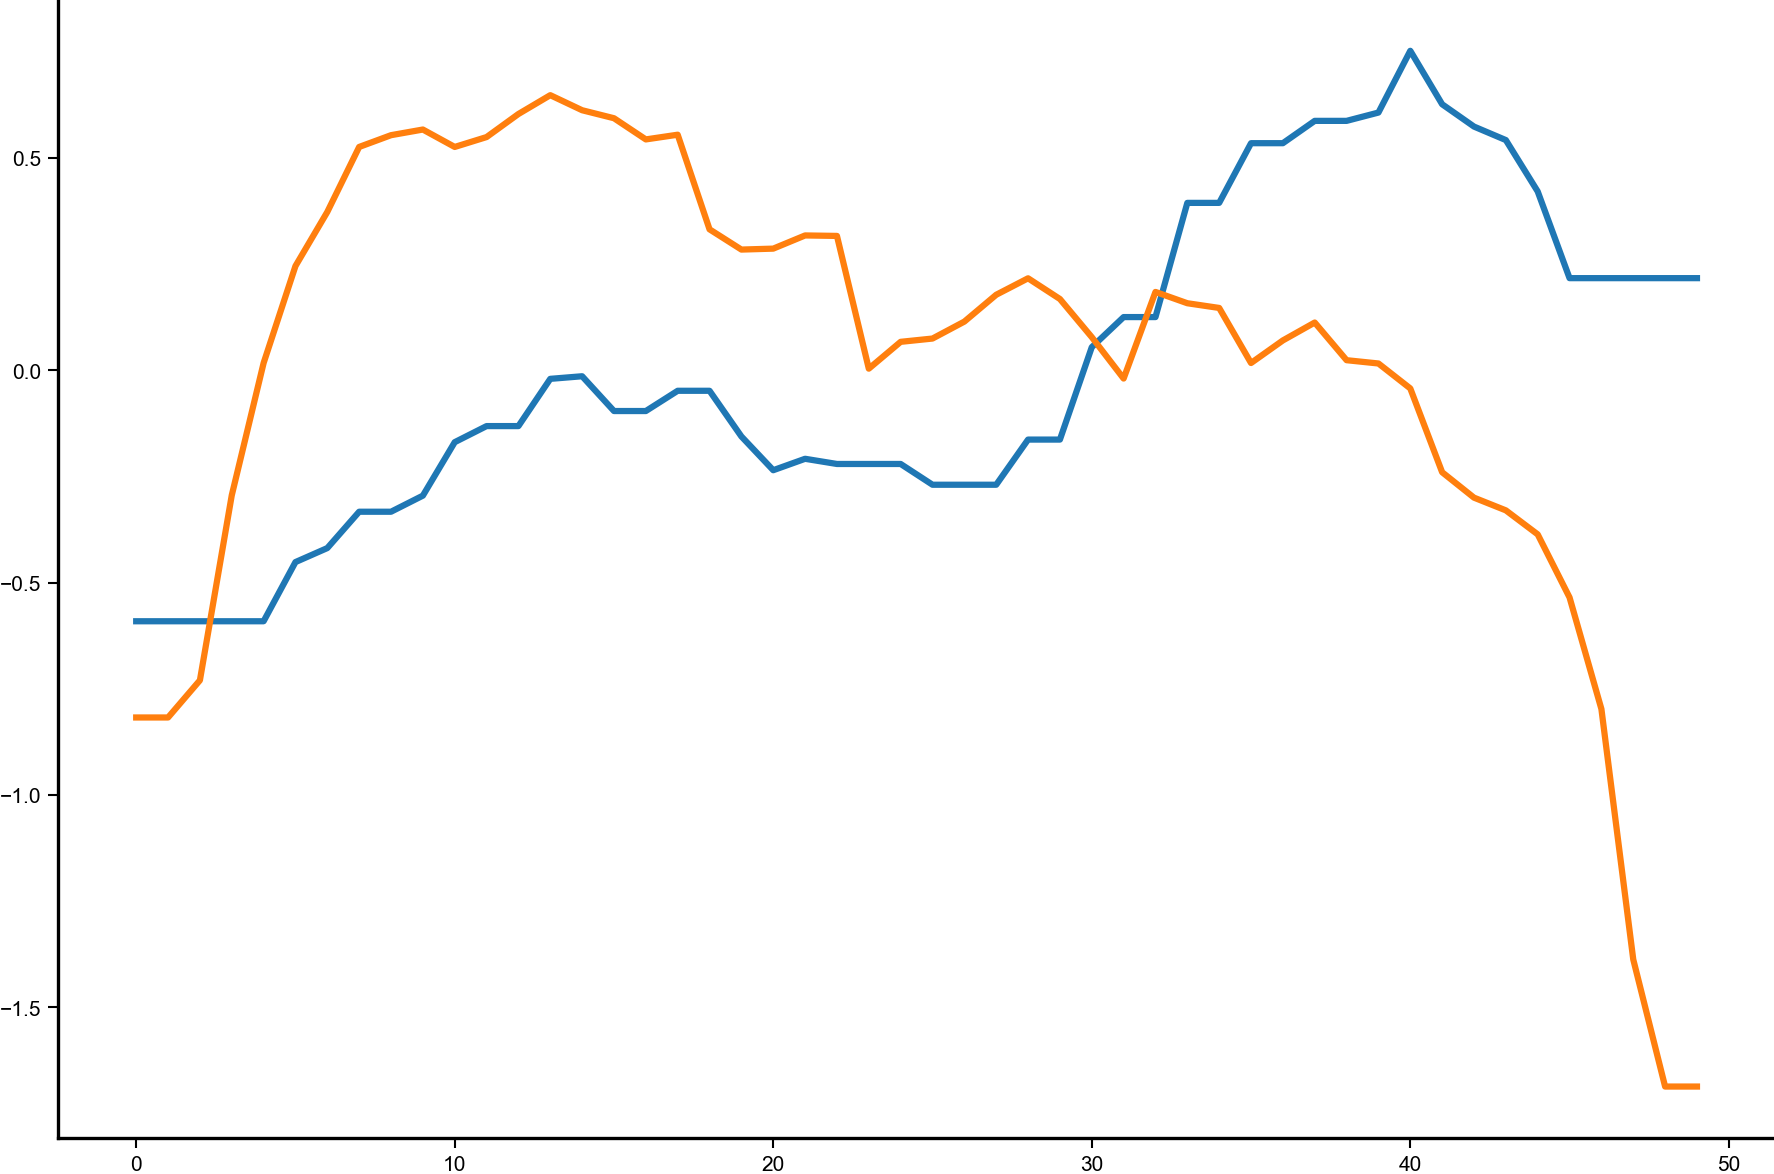

In [140]:
df = dfs['liber-responsories']

ys = get_normalized_contour(df[df['phrase_length'] < 11])
plt.plot(ys.mean(axis=0))

ys = get_normalized_contour(df[df['phrase_length'] >= 11])
plt.plot(ys.mean(axis=0))

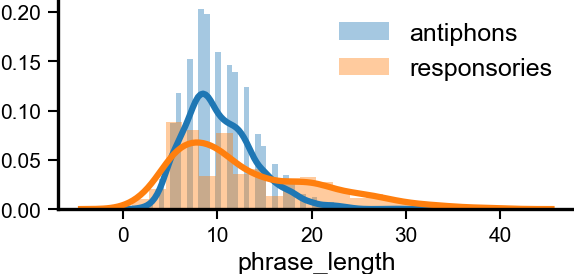

In [249]:
plt.figure(figsize=(2,1))
sns.distplot(dfs['liber-antiphons']['phrase_length'], label='antiphons')
sns.distplot(dfs['liber-responsories']['phrase_length'], label='responsories')
plt.legend()

## Cohen's d

In [47]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

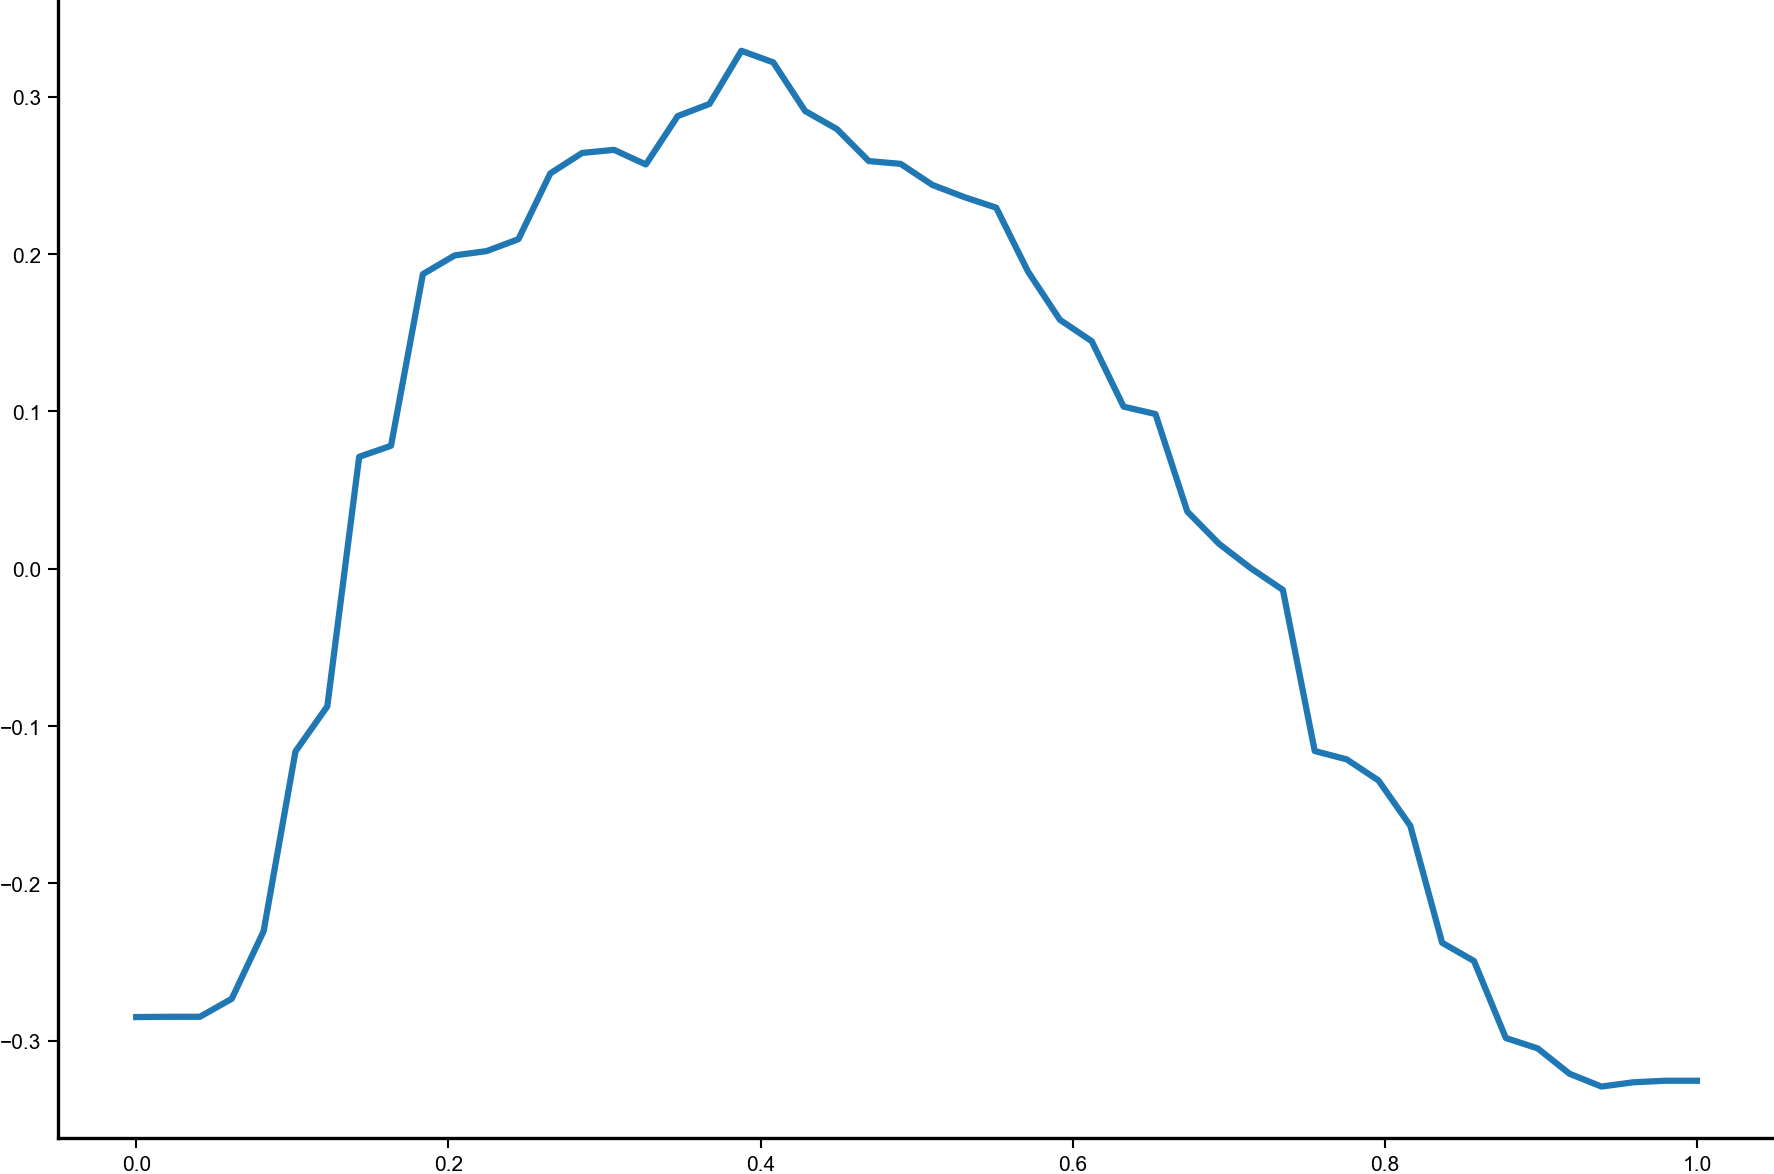

In [50]:
def cohen_ds(contours, baseline):
    xs = np.linspace(0, 1, contours.shape[1])
    b_mean = baseline.mean(axis=0)
    b_std = baseline.std(axis=0)
    mean = contours.mean(axis=0)
    std = .25 * contours.std(axis=0)
    ds = [cohen_d(contours[:,i], baseline[:, i]) for i in range(50)]
    plt.plot(xs, ds)

cohen_ds(contours['erk'], contours['erk-random'])

# Phrase contours vs random segments 

/Users/Bas/repos/papers/fma-melodic-contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


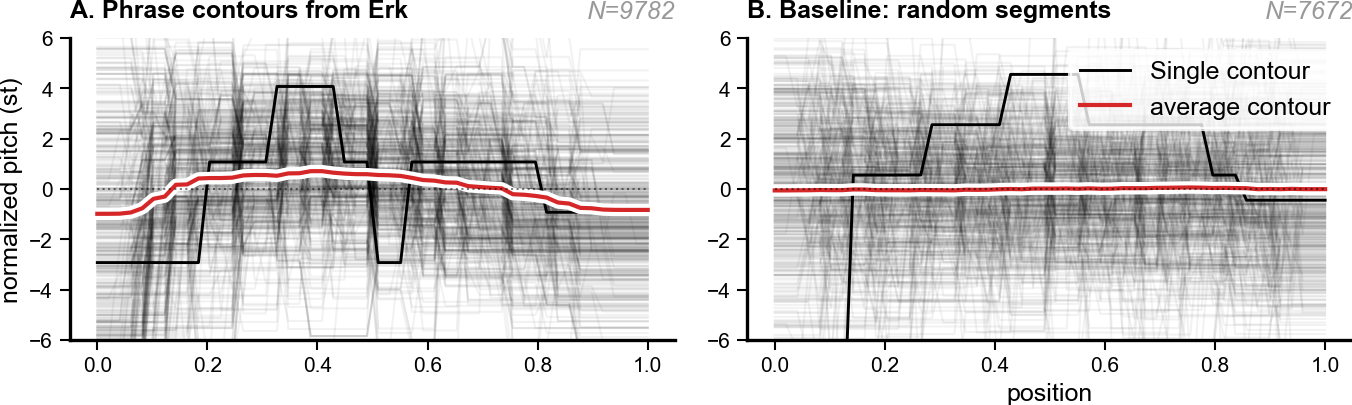

In [8]:
def plot_phrase_contours(contours, N=10):
    xs = np.linspace(0, 1, contours.shape[1])
    plt.plot(xs, contours[:N, :].T, 'k-', lw=0.5, alpha=.05);
    plt.plot(xs, contours[N:N+1, :].T, 'k-', lw=.7, alpha=1, label=f'Single contour');
    plt.plot(xs, contours.mean(axis=0), 'w', lw=3)
    plt.plot(xs, contours.mean(axis=0), 'C3', lw=1, label='average contour')
    plt.plot([0, 1], [0, 0], 'k:', lw=.5, alpha=.5)
    

N = 500
plt.figure(figsize=cm2inch(12, 4))
ax1 = plt.subplot(121)    
plot_phrase_contours(contours['erk'], N=N)
plt.ylim(-6,6)
plt.ylabel('normalized pitch (st)')
title(f'A. Phrase contours from Erk')
show_num_contours(len(contours['erk']), ax1, y=1.05)

ax2 = plt.subplot(122, sharey=ax1)    
plot_phrase_contours(contours['erk-random'], N=N)
plt.ylim(-6,6)
plt.xlabel(f'position')
title(f'B. Baseline: random segments')
show_num_contours(len(contours['erk-random']), ax2, y=1.05)

plt.legend()
plt.tight_layout()
plt.savefig('../figures/fig06-phrase-contours-vs-random-segments.pdf')

# Duration distributions 

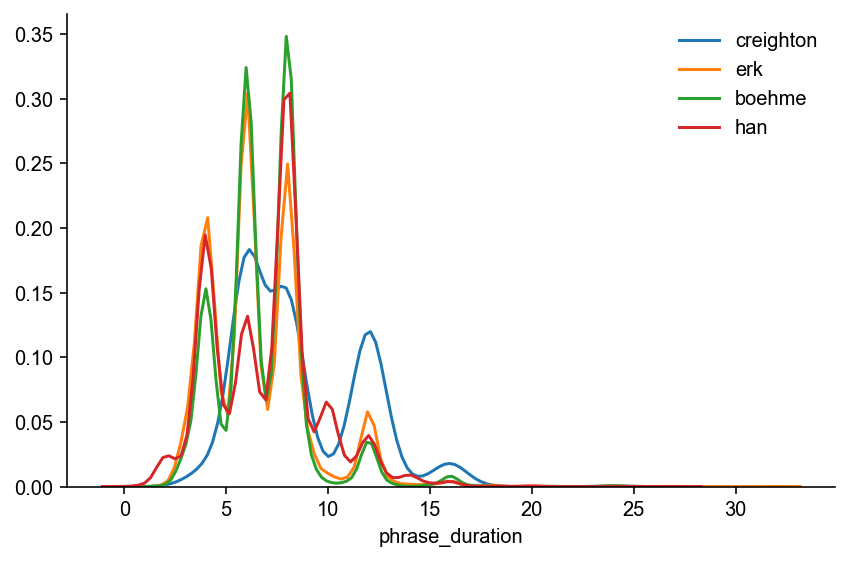

In [81]:
sns.distplot(creighton['phrase_duration'], hist=False, label='creighton')
sns.distplot(erk['phrase_duration'], hist=False, label='erk')
sns.distplot(boehme['phrase_duration'], hist=False, label='boehme')
sns.distplot(han['phrase_duration'], hist=False, label='han')

# Fit polynomials?

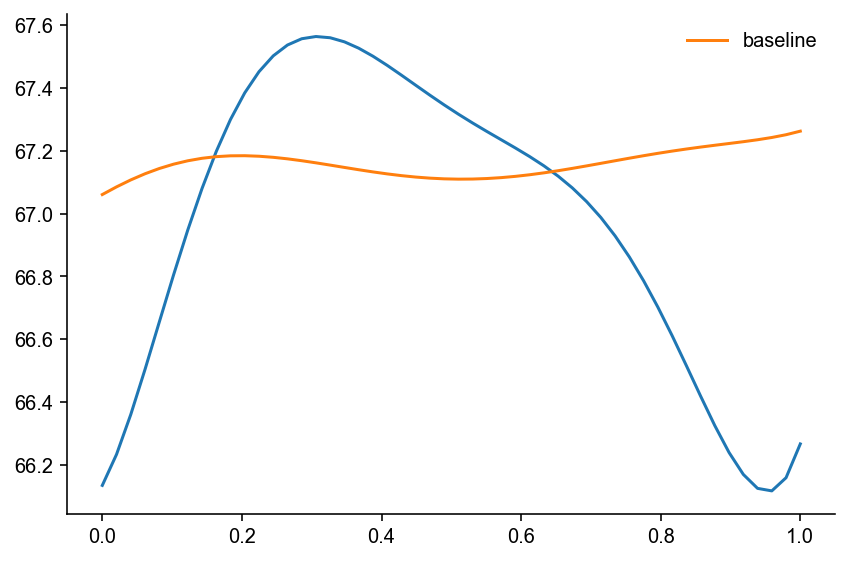

In [54]:
p = np.poly1d(zs.mean(axis=1))
p_r = np.poly1d(zs_r.mean(axis=1))
plt.plot(xs, p(xs))
plt.plot(xs, p_r(xs), label='baseline')
plt.legend()

In [57]:
import scipy.stats as stats

In [62]:
stats.ttest_ind(zs.T, zs_r.T, equal_var=False)

Ttest_indResult(statistic=array([ 5.82546892, -5.63240024,  5.42069551, -5.08332259,  3.87260784,
        2.15716833, -7.11602939]), pvalue=array([5.90161460e-09, 1.83348140e-08, 6.09829337e-08, 3.78732329e-07,
       1.08478896e-04, 3.10202745e-02, 1.19840262e-12]))

In [66]:
import pingouin

In [87]:
pingouin.multivariate_normality(zs_r.T)

(False, 3.87210979921518e-156)

In [80]:
pingouin.multivariate_ttest(zs.T, zs_r.T)

,T2,F,df1,df2,pval
hotelling,502.826,71.784,7,8880,1.930231e-101


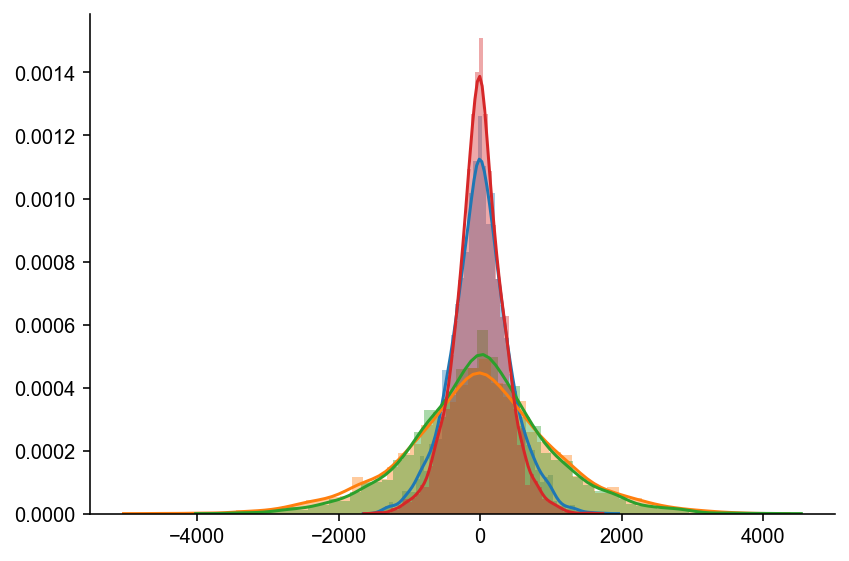

In [175]:
# sns.distplot(zs_r[1, :])
# sns.distplot(zs_r[2, :])
# sns.distplot(zs_r[3, :])

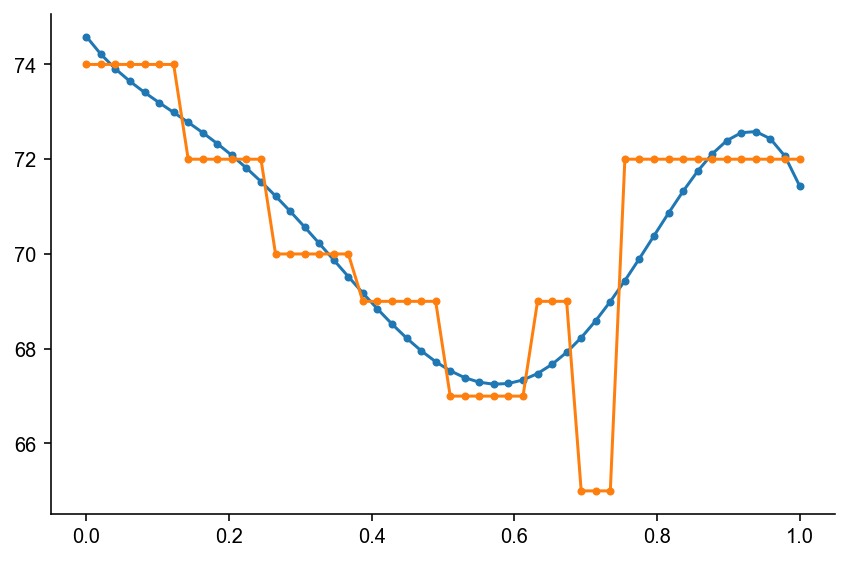

In [120]:
xs = np.linspace(0, 1, 50)
ys = boehme.iloc[1, 4:].astype(np.float64).values
z = np.polyfit(xs, ys, 5)

p = np.poly1d(z)
plt.plot(xs, p(xs), '.-', label=deg)
plt.plot(xs, ys, '.-')